In [1]:
#!pip install keras


In [2]:
#!pip install tensorflow

In [3]:
# Tensorflow - it is a tool or aan open source machine learning freamwork that helps computer learn by themselves

In [4]:
# Neural Network
# they are a class of machine learning algorithms inspired by the structure and function of the human brain
# they are designed to recognize petterns and relationship in the data, making them powerful for tasks such as classification
# they consist of interconnected layers of nodes called as neurons
# where each  node(neurons) performe some computation


In [5]:
#CNN :- it stand for convolutional neural network
# it is used for image classification, object detection
# it is a type of deep learning


In [6]:
# Keras :- is a open source neural network library written in python


In [7]:
#PROJECT DISCRIPTION
# we will be develovping a binnary image classification model where we will be predicition if the 
# given picture is dog or cat


In [8]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'numpy'

In [9]:
# Conv2D :- layers 
# the fully connected layers are called as Dense layers in keras
# flatten will convert numtidemention vector into single dimentional vector


In [10]:
#  load the data
X_train = np.loadtxt("G:/Projects/Folder for csv file/datasets/datasets/input.csv", delimiter= ',' )
Y_train = np.loadtxt("G:/Projects/Folder for csv file/datasets/datasets/labels.csv", delimiter= ',' )
X_test = np.loadtxt("G:/Projects/Folder for csv file/datasets/datasets/input_test.csv", delimiter= ',' )
Y_test = np.loadtxt("G:/Projects/Folder for csv file/datasets/datasets/labels_test.csv", delimiter= ',' )

In [11]:
# print the shap of the dataset
print("shape pf X_train : ", X_train.shape)
print("shape pf Y_train : ", Y_train.shape)
print("shape pf X_test : ", X_test.shape)
print("shape pf Y_test : ", Y_test.shape)

shape pf X_train :  (2000, 30000)
shape pf Y_train :  (2000,)
shape pf X_test :  (400, 30000)
shape pf Y_test :  (400,)


In [12]:
# print the single image data
X_train[1,:]

array([131., 128., 135., ...,  71.,  96.,  74.])

In [13]:
# reshape 
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [14]:
# print the reshap of the dataset
print("shape pf X_train : ", X_train.shape)
print("shape pf Y_train : ", Y_train.shape)
print("shape pf X_test : ", X_test.shape)
print("shape pf Y_test : ", Y_test.shape)

shape pf X_train :  (2000, 100, 100, 3)
shape pf Y_train :  (2000, 1)
shape pf X_test :  (400, 100, 100, 3)
shape pf Y_test :  (400, 1)


In [15]:
# coz rgb value is 0 to 255
X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

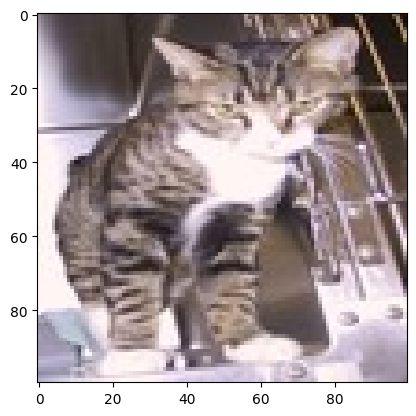

In [17]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [18]:
# next step is to create the model 
# model - work on keras and build the model
# library sequential model and convo2d - use 
# sequential model - the layers are going to be stacked up in the sequence
# the layers are in the form - convolutional layer then max pooling layer then convo then max p
# and then we have fully connected layers
# that's how our convolutional neural network is made

In [19]:
# the first step is to write the number of filters we want to use - we are using 32 number of filters
# the size of the filter (3,3)
# the next paramter will be the activation function - relu function
# input shape - what kind of shape is the model expecting

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (100,100,3)),
    #this is the next layer that is max pooling layer
    #for max pooling layer - we need to just one parameter that is size
    MaxPooling2D((2,2)),

# this agian conv layer, no need to add the input
Conv2D(32,(3,3), activation= 'relu'),
MaxPooling2D((2,2)),

Flatten(),
Dense(64, activation= 'relu'),
Dense(1, activation= 'sigmoid')
])

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Another way to create a model
model = Sequential()
model.add( Conv2D(32, (3,3), activation='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))


In [22]:
model.compile(loss= 'binary_crossentropy', optimizer= 'adam',metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, epochs=9, batch_size= 64)
# number of epochs is to train our model in how much time
# bactch_size is the number of samples that will be used in on iteration

Epoch 1/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 310ms/step - accuracy: 0.4893 - loss: 0.8036
Epoch 2/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.5632 - loss: 0.6720
Epoch 3/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - accuracy: 0.6407 - loss: 0.6290
Epoch 4/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 349ms/step - accuracy: 0.7181 - loss: 0.5626
Epoch 5/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 387ms/step - accuracy: 0.7643 - loss: 0.5015
Epoch 6/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - accuracy: 0.8103 - loss: 0.4345
Epoch 7/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - accuracy: 0.8431 - loss: 0.3840
Epoch 8/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 309ms/step - accuracy: 0.8700 - loss: 0.3359
Epoch 9/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 328ms/step - accuracy: 0.9044 - loss: 0.2547


In [24]:
# accuracy: 0.9835 - loss: 0.0841

In [25]:
# testing data
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6900 - loss: 0.7219


[0.6868413686752319, 0.7124999761581421]

In [26]:
# accuracy is little 

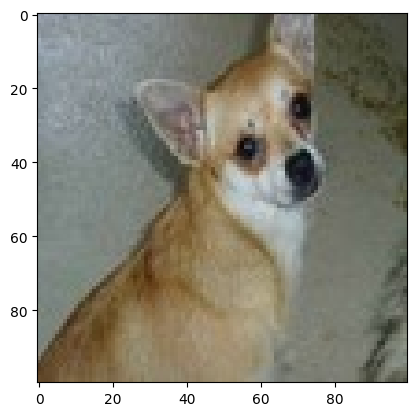

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Our model say it is a :  dog


In [29]:
idx2= random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, : ].reshape(1,100,100,3))


y_pred = y_pred>0.5
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model say it is a : ", pred)